# This is my NPS Project for DS1.1

I am going to explore the 2017 survey dataset for makeschool's appacademy and see if I find anything intersting



In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [262]:
df = pd.read_csv('input_data/2017/student_feedback_surveys.csv')

In [263]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [264]:
len(df)

1453

# First question that I want to ask is: What is the overall NPS rating

This will help us understand how good the school did across all the locations and tracks

I want to get the problem down to this formula:  NPS = (Promoters - Detractors)  (Promoters + Passives + Detractors)


First, let's clean the rating data a little bit

In [265]:
df['Rating (Num)'].value_counts()

8          392
9          384
10         376
7          177
6           59
5           35
4           13
3            8
#ERROR!      3
1            2
2            2
0            2
Name: Rating (Num), dtype: int64

In [266]:
# Get rid of the #ERROR! values
df = df[df['Rating (Num)'] != '#ERROR!']

In [267]:
df['Rating (Num)'].value_counts()

8     392
9     384
10    376
7     177
6      59
5      35
4      13
3       8
1       2
2       2
0       2
Name: Rating (Num), dtype: int64

In [268]:
df['Rating (Num)'].dtypes

dtype('O')

In [269]:
# Convert the rating column to ints
df['Rating (Num)'] = df['Rating (Num)'].astype('int64')
df['Rating (Num)'].dtypes

dtype('int64')

The following functions segment out different types of people based on their rating response

In [270]:
def get_promotors(df):
    return df[df['Rating (Num)'] >= 9]

def get_passives(df):
    return df[(df['Rating (Num)'] >= 7) & (df['Rating (Num)'] <= 8)]

def get_detractors(df):
    return df[df['Rating (Num)'] <= 6]

In [271]:
promoters = get_promotors(df)
passive = get_passives(df)
detractors = get_detractors(df)

In [272]:
num_promoters = len(promoters)
num_passive = len(passive)
num_detractors = len(detractors)

In [273]:
def print_nps_stats(n_pro, n_pass, n_det):
    print("# promoters: {}".format(n_pro))
    print("# Passive: {}".format(n_pass))
    print("# Detractors: {}".format(n_det))

print_nps_stats(num_promoters, num_passive, num_detractors)

# promoters: 760
# Passive: 569
# Detractors: 121


In [274]:
def get_NPS(n_pro, n_pass, n_det):
    return round((n_pro - n_det) / (n_pro + n_pass + n_det) * 100, 2)

In [275]:
print('NPS for 2017 data: {}'.format(get_NPS(num_promoters, num_passive, num_detractors)))

NPS for 2017 data: 44.07


# So overall NPS value is 44.07, which is pretty good

Next, I wanted to find out the NPS by city, to see which city was performing the best

In [276]:
#Get NPS by city

In [277]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [278]:
df['Location'].value_counts()

San Francisco    360
New York City    330
Santa Clara      201
Los Angeles      106
Beijing           78
Chicago           70
Tokyo             65
Redwood City      58
Washington DC     47
Oakland           47
Atlanta           33
Hong Kong         11
Name: Location, dtype: int64

In [279]:
loc_group = df.groupby(['Rating (Num)'])["Location"].value_counts().unstack()

In [280]:
loc_group.fillna(value=0, inplace=True)

In [281]:
loc_group

Location,Atlanta,Beijing,Chicago,Hong Kong,Los Angeles,New York City,Oakland,Redwood City,San Francisco,Santa Clara,Tokyo,Washington DC
Rating (Num),,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,3.0,1.0,3.0,0.0
5,0.0,0.0,0.0,1.0,1.0,9.0,1.0,3.0,6.0,7.0,2.0,3.0
6,0.0,0.0,4.0,2.0,3.0,16.0,1.0,2.0,17.0,5.0,3.0,3.0
7,1.0,6.0,12.0,3.0,8.0,38.0,9.0,10.0,40.0,23.0,10.0,7.0
8,8.0,19.0,17.0,4.0,25.0,98.0,9.0,13.0,95.0,72.0,13.0,14.0


As you can see above, I grouped the dataset by the Rating and City, and now I can start figuring out the NPS by city similarly to how I did before

In [282]:
def get_dpp_from_groupby(df):
    
    output_dict = {}
        
    for col in df.columns:
        output_dict[col] = {'detractor': 0.0, 'passive': 0.0, 'promoter': 0.0}
        for i, row in enumerate(df[col]):
            if i <= 6:
                output_dict[col]['detractor'] += row
            if i >= 7 and i <= 8:
                output_dict[col]['passive'] += row
            else:
                output_dict[col]['promoter'] += row

    return output_dict

In [286]:
city_dict = get_dpp_from_groupby(loc_group)         

for k, v in data_dict.items():
    print("{} -> {}".format(k,v))

Atlanta -> {'detractor': 0.0, 'passive': 9.0, 'promoter': 24.0}
Beijing -> {'detractor': 0.0, 'passive': 25.0, 'promoter': 53.0}
Chicago -> {'detractor': 4.0, 'passive': 29.0, 'promoter': 41.0}
Hong Kong -> {'detractor': 3.0, 'passive': 7.0, 'promoter': 4.0}
Los Angeles -> {'detractor': 5.0, 'passive': 33.0, 'promoter': 73.0}
New York City -> {'detractor': 35.0, 'passive': 136.0, 'promoter': 194.0}
Oakland -> {'detractor': 2.0, 'passive': 18.0, 'promoter': 29.0}
Redwood City -> {'detractor': 5.0, 'passive': 23.0, 'promoter': 35.0}
San Francisco -> {'detractor': 31.0, 'passive': 135.0, 'promoter': 225.0}
Santa Clara -> {'detractor': 13.0, 'passive': 95.0, 'promoter': 106.0}
Tokyo -> {'detractor': 9.0, 'passive': 23.0, 'promoter': 42.0}
Washington DC -> {'detractor': 6.0, 'passive': 21.0, 'promoter': 26.0}


In [287]:
nps_city_dict = {'City': [], 'NPS': []}

for k, v in track_dict.items():
    nps_city_dict['City'].append(k)
    nps_city_dict['NPS'].append(get_NPS(v['promoter'], v['passive'], v['detractor']))

In [288]:
nps_city_dict

{'City': ['Apps', 'Apps, Explorer', 'Games', 'Games, Explorer', 'VR'],
 'NPS': [46.15, 36.69, 61.29, 72.09, 74.19]}

In [291]:
nps_city_df = pd.DataFrame(nps_dict_fordf)
nps_city_df

,City,NPS
0,Atlanta,72.73
1,Beijing,67.95
2,Chicago,50.00
3,Hong Kong,7.14
4,Los Angeles,61.26
5,New York City,43.56
6,Oakland,55.10
7,Redwood City,47.62
8,San Francisco,49.62
9,Santa Clara,43.46


In [292]:
nps_city_df = nps_city_df.sort_values(by="NPS", ascending=False)

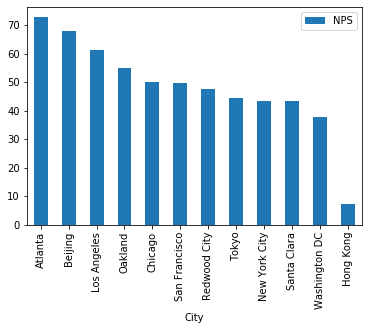

In [293]:
# These are the cities with the best NPS
nps_city_df.plot(x='City', y='NPS', kind='bar')

# As you can see, Atlanta had the best NPS while Hong Kong had a very low one, we will investigate that later

Now I decided to try to get the NPS by track, very similarly to how I got it for city

In [294]:
#Get NPS by track

In [295]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [296]:
track_group = df

In [297]:
track_group = track_group.groupby('Rating (Num)')['Track'].value_counts().unstack()
track_group = track_group.fillna(0)
track_group

Track,Apps,"Apps, Explorer",Games,"Games, Explorer",VR
Rating (Num),,,,,
0,1.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0
3,5.0,3.0,0.0,0.0,0.0
4,5.0,3.0,2.0,0.0,1.0
5,25.0,7.0,1.0,0.0,0.0
6,40.0,9.0,6.0,0.0,1.0
7,111.0,36.0,12.0,5.0,3.0
8,244.0,73.0,54.0,7.0,9.0


In [298]:
track_dict = get_dpp_from_groupby(app_group)

In [299]:
track_dict

{'Apps': {'detractor': 78.0, 'passive': 355.0, 'promoter': 516.0},
 'Apps, Explorer': {'detractor': 24.0, 'passive': 109.0, 'promoter': 115.0},
 'Games': {'detractor': 9.0, 'passive': 66.0, 'promoter': 142.0},
 'Games, Explorer': {'detractor': 0.0, 'passive': 12.0, 'promoter': 31.0},
 'VR': {'detractor': 2.0, 'passive': 12.0, 'promoter': 48.0}}

In [300]:
nps_track_dict = {'Track': [], 'NPS': []}

for k, v in track_dict.items():
    nps_track_dict['Track'].append(k)
    nps_track_dict['NPS'].append(get_NPS(v['promoter'], v['passive'], v['detractor']))

In [301]:
nps_track_df = pd.DataFrame().from_dict(nps_track_dict)

In [302]:
nps_track_df

,Track,NPS
0,Apps,46.15
1,"Apps, Explorer",36.69
2,Games,61.29
3,"Games, Explorer",72.09
4,VR,74.19


In [303]:
nps_track_df = nps_track_df.sort_values('NPS')

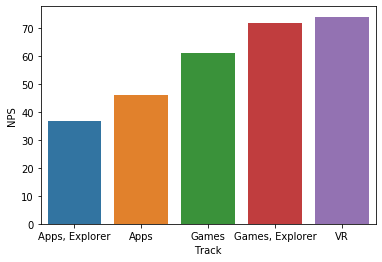

In [304]:
sns.barplot(x='Track', y='NPS', data=nps_track_df)

# As you can see, VR had the best responses, while the App category was in last place

I then decided to figure out which track had the best promoter to detractor ratio, which excludes the passive group. This will let me see which track had the most amount of love and least amount of hate!

In [305]:
#Which track has best promotor to detractor ratio

In [306]:
track_group = df

In [307]:
track_group = track_group.groupby('Rating (Num)')['Track'].value_counts().unstack()
track_group = track_group.fillna(0)
track_group

Track,Apps,"Apps, Explorer",Games,"Games, Explorer",VR
Rating (Num),,,,,
0,1.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0
3,5.0,3.0,0.0,0.0,0.0
4,5.0,3.0,2.0,0.0,1.0
5,25.0,7.0,1.0,0.0,0.0
6,40.0,9.0,6.0,0.0,1.0
7,111.0,36.0,12.0,5.0,3.0
8,244.0,73.0,54.0,7.0,9.0


In [308]:
track_dict = get_dpp_from_groupby(app_group)

In [309]:
track_dict

{'Apps': {'detractor': 78.0, 'passive': 355.0, 'promoter': 516.0},
 'Apps, Explorer': {'detractor': 24.0, 'passive': 109.0, 'promoter': 115.0},
 'Games': {'detractor': 9.0, 'passive': 66.0, 'promoter': 142.0},
 'Games, Explorer': {'detractor': 0.0, 'passive': 12.0, 'promoter': 31.0},
 'VR': {'detractor': 2.0, 'passive': 12.0, 'promoter': 48.0}}

In [310]:
for track_name, values in track_dict.items():
    if values['detractor'] != 0:
        
        sum = values['detractor'] + values['promoter']
        ratio = values['promoter'] / sum
        
        print("Promoter-Detractor Ratio for {} is -> {}%".format(track_name, ratio))
    else:
        print("Promoter-Detractor Ratio for {} is -> 100%".format(track_name))

Promoter-Detractor Ratio for Apps is -> 0.8686868686868687%
Promoter-Detractor Ratio for Apps, Explorer is -> 0.8273381294964028%
Promoter-Detractor Ratio for Games is -> 0.9403973509933775%
Promoter-Detractor Ratio for Games, Explorer is -> 100%
Promoter-Detractor Ratio for VR is -> 0.96%


# As you can see, Games Explorer came in First place even though VR had the best NPS, but Apps still were in the last 2 places

I then wanted to see if students enjoyed their academy experiance at the same level as time went along

In [311]:
# Does student's experiance get better as they go along?

In [312]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [313]:
or_by_week = df.sort_values('Week')

In [314]:
or_by_week = or_by_week[['Week', 'Rating (Num)']]

In [315]:
or_by_week.head()

,Week,Rating (Num)
0,Week 1,3
254,Week 1,8
253,Week 1,8
252,Week 1,8
251,Week 1,8


In [316]:
or_by_week_group = or_by_week.groupby('Week')['Rating (Num)'].value_counts().unstack()

In [317]:
or_by_week_group = or_by_week_group.fillna(0)
or_by_week_group

Rating (Num),0,1,2,3,4,5,6,7,8,9,10
Week,,,,,,,,,,,
Week 1,0.0,0.0,0.0,1.0,6.0,9.0,12.0,40.0,91.0,61.0,68.0
Week 2,1.0,0.0,0.0,2.0,2.0,6.0,12.0,34.0,82.0,76.0,61.0
Week 3,0.0,1.0,0.0,1.0,0.0,5.0,13.0,22.0,64.0,69.0,66.0
Week 4,0.0,0.0,0.0,2.0,3.0,6.0,8.0,25.0,49.0,55.0,45.0
Week 5,1.0,0.0,1.0,0.0,2.0,4.0,7.0,22.0,45.0,45.0,52.0
Week 6,0.0,0.0,1.0,1.0,0.0,1.0,5.0,18.0,41.0,34.0,43.0
Week 7,0.0,1.0,0.0,1.0,0.0,4.0,2.0,15.0,19.0,41.0,37.0
Week 8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,4.0


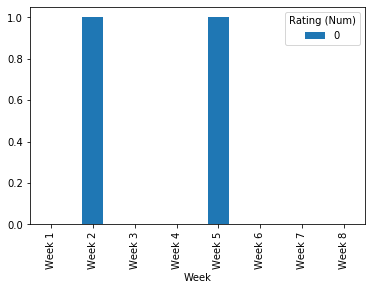

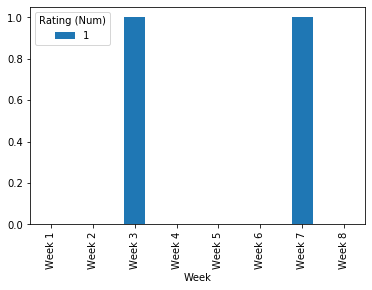

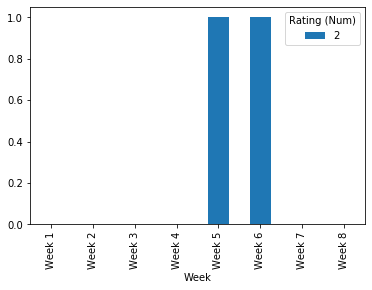

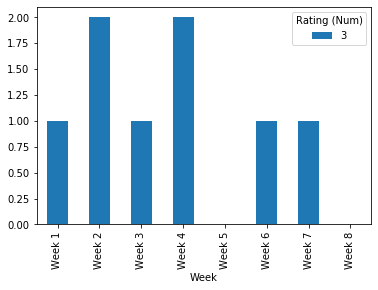

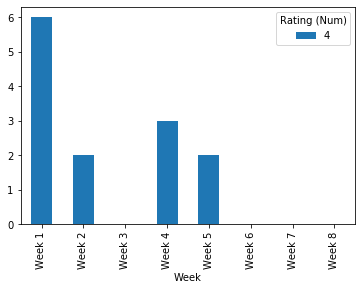

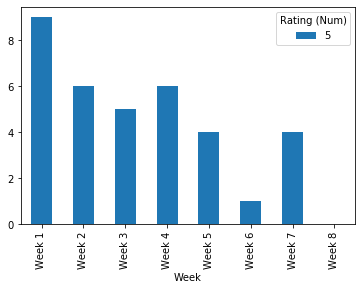

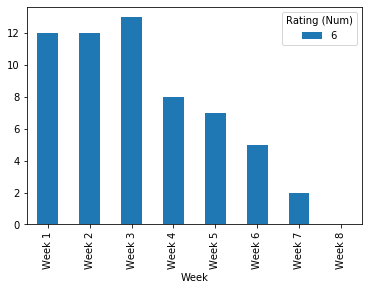

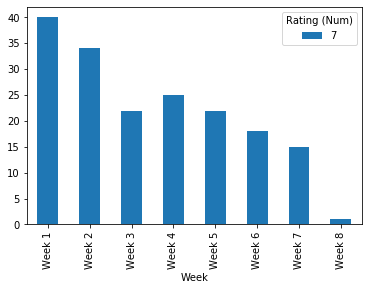

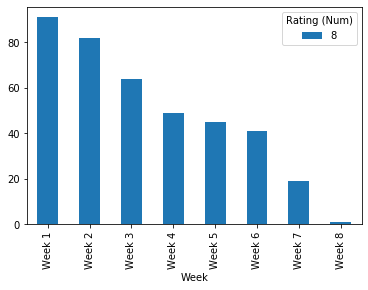

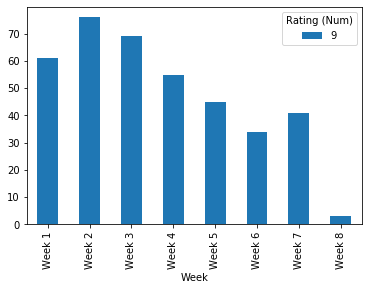

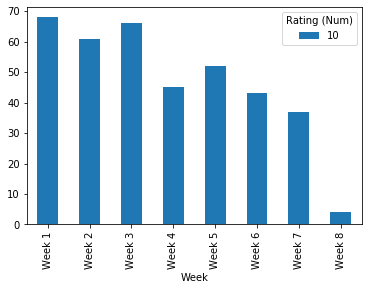

In [318]:
for col in or_by_week_group.columns:
    or_by_week_group[[col]].plot(kind='bar')

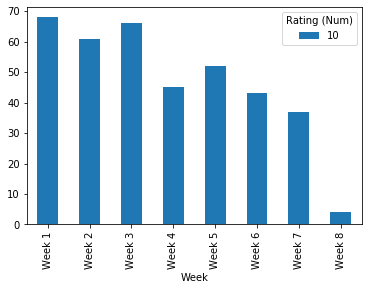

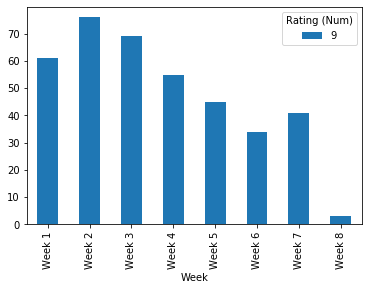

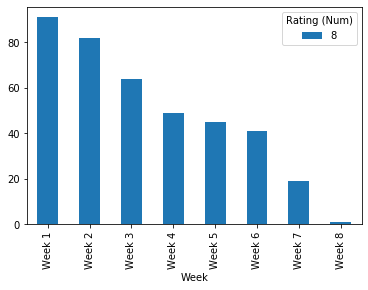

In [319]:
# Only for 10, 9 and 8 rating
or_by_week_group[[10]].plot(kind='bar')
or_by_week_group[[9]].plot(kind='bar')
or_by_week_group[[8]].plot(kind='bar')

# As you can see, almost every week the number of high ratings declined

I then went on to try to figure out if there is anything else that is interesting about the data

In [320]:
# What can we find out to help the business

I wanted to see if there was a correlation between time and how students felt about schedule pacing

In [328]:
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


In [329]:
or_by_week = df.sort_values('Week')

In [330]:
or_by_week = or_by_week[['Week', 'Schedule Pacing']]

In [331]:
or_by_week.head()

,Week,Schedule Pacing
0,Week 1,Just right
254,Week 1,Just right
253,Week 1,A little too fast
252,Week 1,Just right
251,Week 1,A little too fast


In [332]:
or_by_week[['Schedule Pacing']].isnull().sum()

Schedule Pacing    0
dtype: int64

In [333]:
or_by_week_group = or_by_week.groupby('Week')['Schedule Pacing'].value_counts().unstack()

In [334]:
or_by_week_group = or_by_week_group.fillna(0)
or_by_week_group

Schedule Pacing,A little too fast,A little too slow,Just right,Way too fast,Way too slow
Week,,,,,
Week 1,64.0,39.0,179.0,5.0,1.0
Week 2,80.0,27.0,161.0,7.0,1.0
Week 3,49.0,14.0,175.0,2.0,1.0
Week 4,30.0,8.0,151.0,3.0,1.0
Week 5,29.0,6.0,143.0,1.0,0.0
Week 6,21.0,2.0,119.0,2.0,0.0
Week 7,15.0,2.0,101.0,2.0,0.0
Week 8,1.0,2.0,5.0,1.0,0.0


# Turns out that the majority of people felt that the speed was just right, while a decent amount felt like it was too fast. As time went on, it looks like the responses to the surveys went down, but you can still see that almost noone felt like the speed was too slow or too fast.

I then decided to look at Hong Kong, since it had a very small NPS compared to everyone else

In [182]:
hk_df = df[df['Location'] == 'Hong Kong']

In [186]:
hk_df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
520,550,Hong Kong,"Apps, Explorer",Week 1,7,A little too fast
521,551,Hong Kong,"Apps, Explorer",Week 1,8,Just right
522,552,Hong Kong,"Apps, Explorer",Week 1,7,A little too fast
523,553,Hong Kong,"Apps, Explorer",Week 1,5,Just right
524,554,Hong Kong,Apps,Week 1,9,A little too slow
525,555,Hong Kong,"Apps, Explorer",Week 1,7,Just right
727,765,Hong Kong,"Apps, Explorer",Week 2,6,A little too slow
729,767,Hong Kong,"Apps, Explorer",Week 2,8,A little too fast
735,773,Hong Kong,"Apps, Explorer",Week 2,8,A little too fast
752,790,Hong Kong,"Apps, Explorer",Week 2,6,A little too fast


In [184]:
hk_df_passive = get_passives(hk_df)

In [185]:
hk_df_passive

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
520,550,Hong Kong,"Apps, Explorer",Week 1,7,A little too fast
521,551,Hong Kong,"Apps, Explorer",Week 1,8,Just right
522,552,Hong Kong,"Apps, Explorer",Week 1,7,A little too fast
525,555,Hong Kong,"Apps, Explorer",Week 1,7,Just right
729,767,Hong Kong,"Apps, Explorer",Week 2,8,A little too fast
735,773,Hong Kong,"Apps, Explorer",Week 2,8,A little too fast
769,807,Hong Kong,"Apps, Explorer",Week 2,8,A little too fast


# Turns out the hong kong data is corrupt, as it only has up till week 2, and doesnt seem to have a lot of people. Therefore, we should just disregard this data point

#T